# Graphing the simulation time for serial otb implementation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob

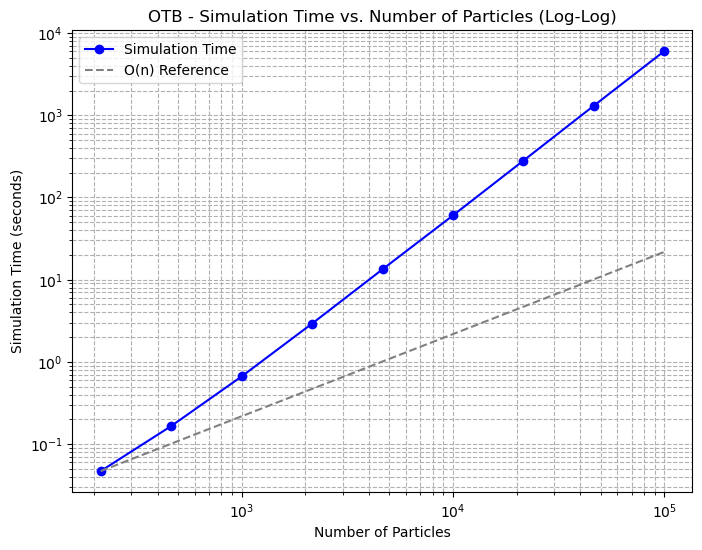

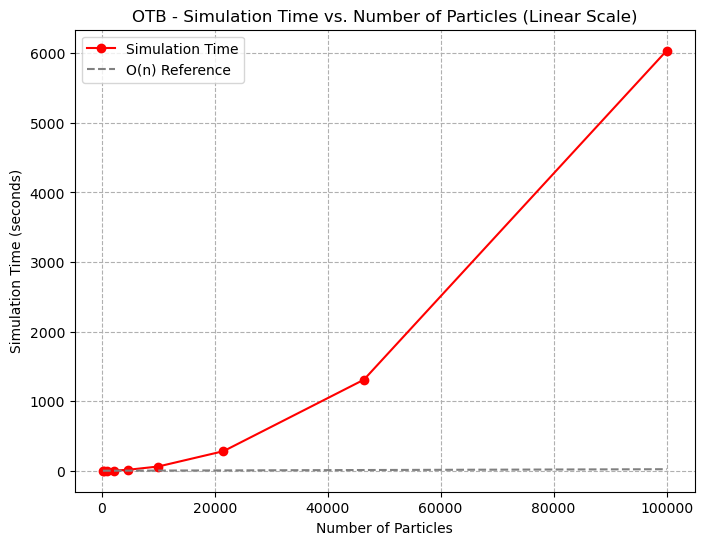

In [2]:
# Load data
data = np.loadtxt("./serial_out/simulation_times.txt", delimiter=" ", skiprows=1)

# Extract n_particles and simulation times
n_particles = data[:, 0]
simulation_times = data[:, 1]

# Generate O(n) reference line
n_min = n_particles[0]
n_max = n_particles[-1]
n_ref = np.array([n_min, n_max])
o_n_ref = simulation_times[0] * (n_ref / n_particles[0])

# Plot log-log graph
plt.figure(figsize=(8,6))
plt.loglog(n_particles, simulation_times, marker='o', linestyle='-', color='b', label="Simulation Time")
plt.loglog(n_ref, o_n_ref, linestyle='--', color='gray', label="O(n) Reference")

# Labels and title of log-log
plt.xlabel("Number of Particles")
plt.ylabel("Simulation Time (seconds)")
plt.title("OTB - Simulation Time vs. Number of Particles (Log-Log)")
plt.legend()
plt.grid(True, which="both", linestyle="--")

# Show log-log plot
plt.show()

# Plot linear scale graph of linear
plt.figure(figsize=(8,6))
plt.plot(n_particles, simulation_times, marker='o', linestyle='-', color='r', label="Simulation Time")
plt.plot(n_ref, o_n_ref, linestyle='--', color='gray', label="O(n) Reference")

# Labels and title of linear
plt.xlabel("Number of Particles")
plt.ylabel("Simulation Time (seconds)")
plt.title("OTB - Simulation Time vs. Number of Particles (Linear Scale)")
plt.legend()
plt.grid(True, linestyle="--")

# Show linear plot
plt.show()


# Graphing the timing for the serial optimized implementation

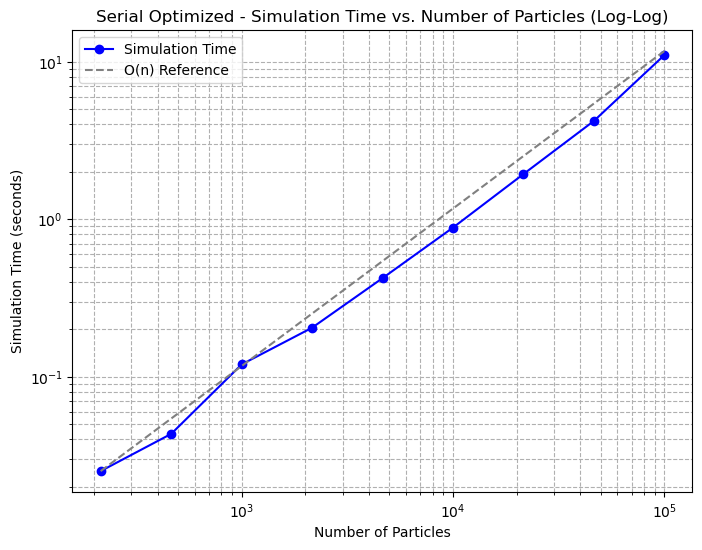

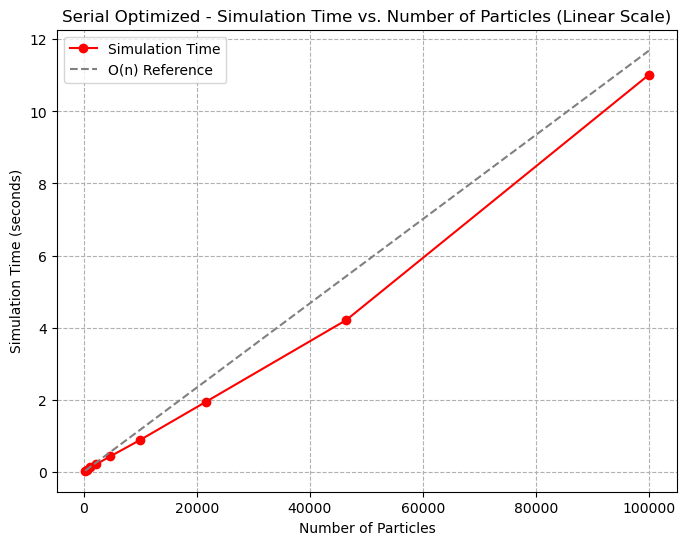

In [3]:
data = np.loadtxt("./serial_out_2/simulation_times.txt", delimiter=" ", skiprows=1)

n_particles = data[:, 0]
simulation_times = data[:, 1]

n_min = n_particles[0]
n_max = n_particles[-1]
n_ref = np.array([n_min, n_max])
o_n_ref = simulation_times[0] * (n_ref / n_particles[0])

plt.figure(figsize=(8,6))
plt.loglog(n_particles, simulation_times, marker='o', linestyle='-', color='b', label="Simulation Time")
plt.loglog(n_ref, o_n_ref, linestyle='--', color='gray', label="O(n) Reference")

plt.xlabel("Number of Particles")
plt.ylabel("Simulation Time (seconds)")
plt.title("Serial Optimized - Simulation Time vs. Number of Particles (Log-Log)")
plt.legend()
plt.grid(True, which="both", linestyle="--")

plt.show()

plt.figure(figsize=(8,6))
plt.plot(n_particles, simulation_times, marker='o', linestyle='-', color='r', label="Simulation Time")
plt.plot(n_ref, o_n_ref, linestyle='--', color='gray', label="O(n) Reference")

plt.xlabel("Number of Particles")
plt.ylabel("Simulation Time (seconds)")
plt.title("Serial Optimized - Simulation Time vs. Number of Particles (Linear Scale)")
plt.legend()
plt.grid(True, linestyle="--")

# Show linear plot
plt.show()


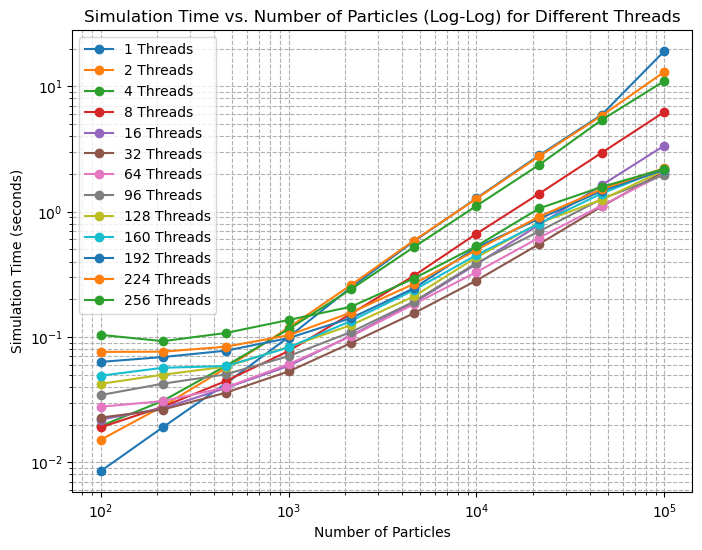

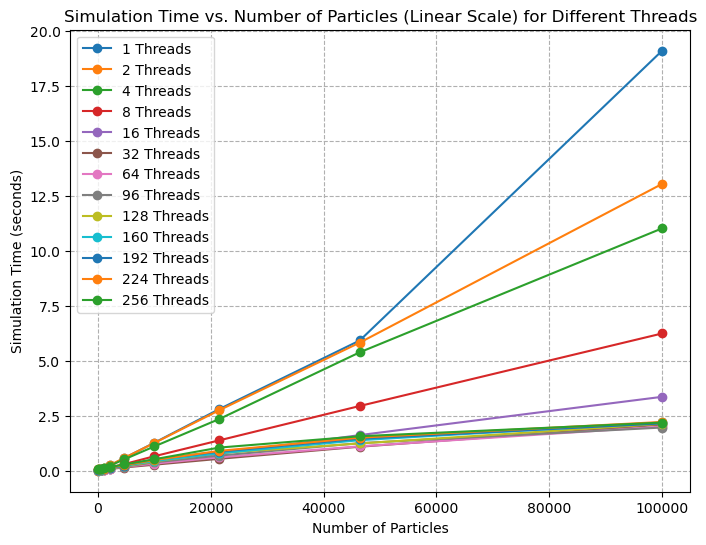

In [7]:
# Directory containing OpenMP simulation time files
data_dir = "./omp_out/"
file_pattern = "simulation_times_*.txt"

# Find all simulation time files
files = glob.glob(data_dir + file_pattern)

# Dictionary to store data from different thread runs
thread_data = {}

# Read each file and extract data
for file in files:
    # Extract thread count from filename
    thread_count = int(file.split("_")[-1].split(".")[0])

    # Load data
    data = np.loadtxt(file, delimiter=" ", skiprows=1)
    n_particles = data[:, 0]
    simulation_times = data[:, 2]  # Column index 2 for simulation time

    # Store in dictionary
    thread_data[thread_count] = (n_particles, simulation_times)

# Plot log-log graph
plt.figure(figsize=(8, 6))
for threads, (n_particles, simulation_times) in sorted(thread_data.items()):
    plt.loglog(n_particles, simulation_times, marker='o', linestyle='-', label=f"{threads} Threads")

plt.xlabel("Number of Particles")
plt.ylabel("Simulation Time (seconds)")
plt.title("Simulation Time vs. Number of Particles (Log-Log) for Different Threads")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

# Plot linear scale graph
plt.figure(figsize=(8, 6))
for threads, (n_particles, simulation_times) in sorted(thread_data.items()):
    plt.plot(n_particles, simulation_times, marker='o', linestyle='-', label=f"{threads} Threads")

plt.xlabel("Number of Particles")
plt.ylabel("Simulation Time (seconds)")
plt.title("Simulation Time vs. Number of Particles (Linear Scale) for Different Threads")
plt.legend()
plt.grid(True, linestyle="--")
plt.show()


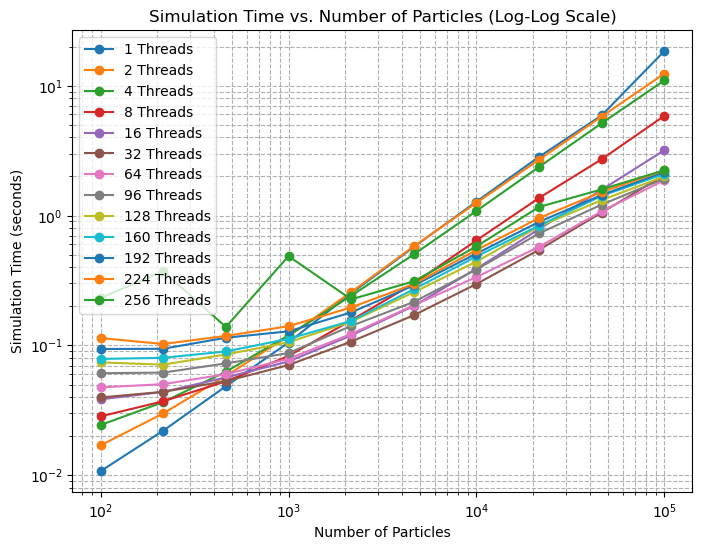

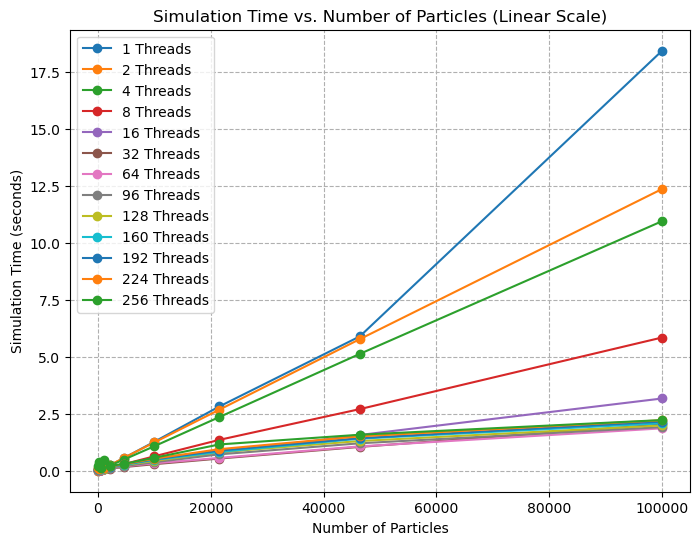

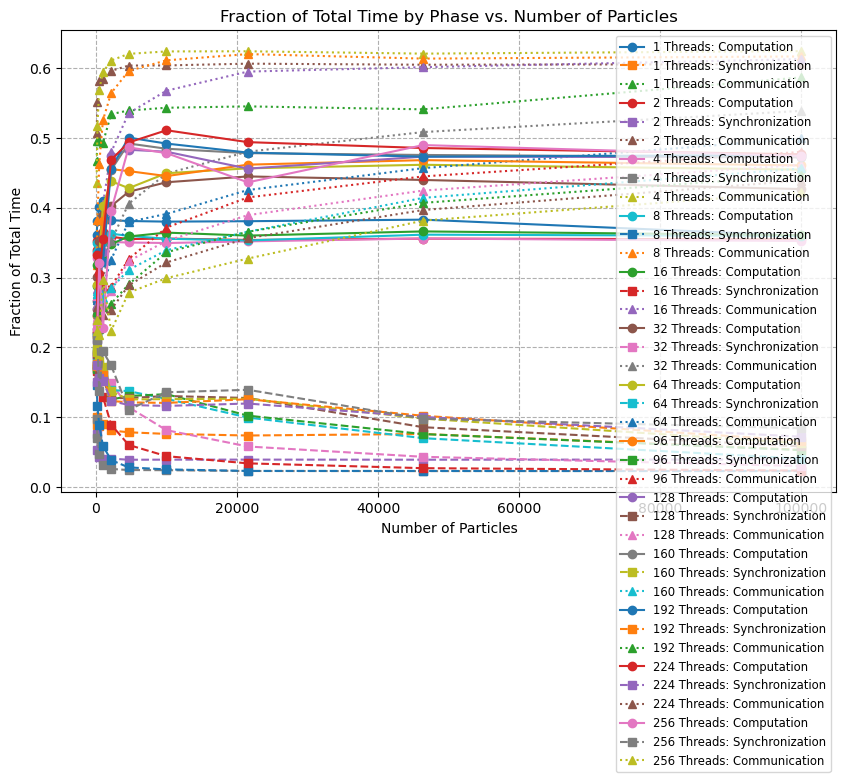

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the timing data file
timing_data_file = "./omp_out_timing/timing_data.txt"
# Expected columns: n_particles, threads, simulation_time, total_time, computation_time, synchronization_time, communication_time
data = np.loadtxt(timing_data_file, delimiter=" ", skiprows=1)

# Unpack columns for clarity
n_particles = data[:, 0]
threads     = data[:, 1]
sim_time    = data[:, 2]
total_time  = data[:, 3]
comp_time   = data[:, 4]
sync_time   = data[:, 5]
comm_time   = data[:, 6]

# Get the unique thread counts in the data
unique_threads = np.unique(threads)

# Create a dictionary mapping each thread count to its data subset
thread_data = {}
for t in unique_threads:
    mask = threads == t
    thread_data[int(t)] = (
        n_particles[mask],
        sim_time[mask],
        total_time[mask],
        comp_time[mask],
        sync_time[mask],
        comm_time[mask]
    )

# Plot log-log graph
plt.figure(figsize=(8, 6))
for t in sorted(thread_data.keys()):
    n_vals, sim_vals, _, _, _, _ = thread_data[t]
    plt.loglog(n_vals, sim_vals, marker='o', linestyle='-', label=f"{t} Threads")
plt.xlabel("Number of Particles")
plt.ylabel("Simulation Time (seconds)")
plt.title("Simulation Time vs. Number of Particles (Log-Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

# Plot linear scale graph
plt.figure(figsize=(8, 6))
for t in sorted(thread_data.keys()):
    n_vals, sim_vals, _, _, _, _ = thread_data[t]
    plt.plot(n_vals, sim_vals, marker='o', linestyle='-', label=f"{t} Threads")
plt.xlabel("Number of Particles")
plt.ylabel("Simulation Time (seconds)")
plt.title("Simulation Time vs. Number of Particles (Linear Scale)")
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

# Compute the fraction of total time spent in each phase for each run.
plt.figure(figsize=(10, 6))
for t in sorted(thread_data.keys()):
    n_vals, _, tot_vals, comp_vals, sync_vals, comm_vals = thread_data[t]
    frac_comp = comp_vals / tot_vals
    frac_sync = sync_vals / tot_vals
    frac_comm = comm_vals / tot_vals

    plt.plot(n_vals, frac_comp, marker='o', linestyle='-', label=f"{t} Threads: Computation")
    plt.plot(n_vals, frac_sync, marker='s', linestyle='--', label=f"{t} Threads: Synchronization")
    plt.plot(n_vals, frac_comm, marker='^', linestyle=':', label=f"{t} Threads: Communication")

plt.xlabel("Number of Particles")
plt.ylabel("Fraction of Total Time")
plt.title("Fraction of Total Time by Phase vs. Number of Particles")
plt.legend(fontsize='small', loc='best')
plt.grid(True, linestyle="--")
plt.show()


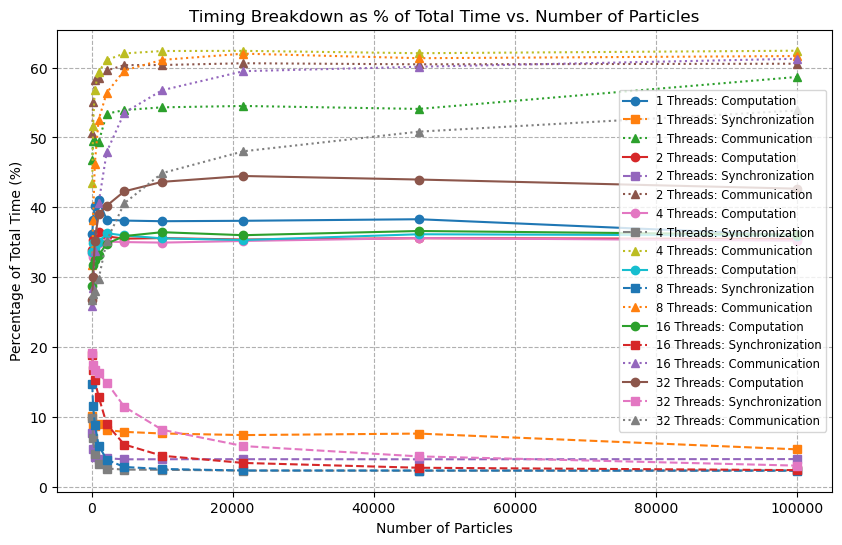

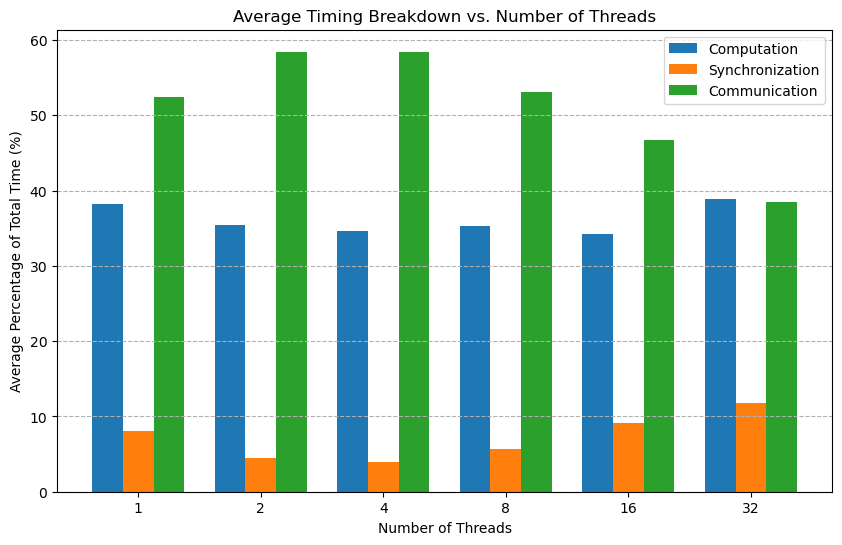

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the timing data file.
# Expected columns: n_particles, threads, simulation_time, total_time, computation_time, synchronization_time, communication_time
timing_data_file = "./omp_out_timing/timing_data.txt"
data = np.loadtxt(timing_data_file, delimiter=" ", skiprows=1)

# Unpack columns for clarity.
n_particles = data[:, 0]
threads     = data[:, 1]
sim_time    = data[:, 2]
total_time  = data[:, 3]
comp_time   = data[:, 4]
sync_time   = data[:, 5]
comm_time   = data[:, 6]

# Filter only for threads in [1, 2, 4, 8, 16, 32].
allowed_threads = np.array([1, 2, 4, 8, 16, 32])
thread_data = {}
for t in allowed_threads:
    mask = threads == t
    if np.any(mask):
        thread_data[int(t)] = (
            n_particles[mask],
            sim_time[mask],
            total_time[mask],
            comp_time[mask],
            sync_time[mask],
            comm_time[mask]
        )

# For each thread count, plot the percentage breakdown (each phase / total_time * 100) vs. number of particles.
plt.figure(figsize=(10, 6))
for t in sorted(thread_data.keys()):
    n_vals, _, tot_vals, comp_vals, sync_vals, comm_vals = thread_data[t]
    frac_comp = (comp_vals / tot_vals) * 100
    frac_sync = (sync_vals / tot_vals) * 100
    frac_comm = (comm_vals / tot_vals) * 100

    plt.plot(n_vals, frac_comp, marker='o', linestyle='-', label=f"{t} Threads: Computation")
    plt.plot(n_vals, frac_sync, marker='s', linestyle='--', label=f"{t} Threads: Synchronization")
    plt.plot(n_vals, frac_comm, marker='^', linestyle=':', label=f"{t} Threads: Communication")

plt.xlabel("Number of Particles")
plt.ylabel("Percentage of Total Time (%)")
plt.title("Timing Breakdown as % of Total Time vs. Number of Particles")
plt.legend(fontsize='small', loc='best')
plt.grid(True, which="both", linestyle="--")
plt.show()

# For each thread count, compute the average percentage (over all n_particles values) for each phase.
avg_comp = []
avg_sync = []
avg_comm = []
thread_counts = []
for t in sorted(thread_data.keys()):
    _, _, tot_vals, comp_vals, sync_vals, comm_vals = thread_data[t]
    avg_comp.append(np.mean((comp_vals / tot_vals) * 100))
    avg_sync.append(np.mean((sync_vals / tot_vals) * 100))
    avg_comm.append(np.mean((comm_vals / tot_vals) * 100))
    thread_counts.append(t)

# Create a grouped bar chart.
x = np.arange(len(thread_counts))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, avg_comp, width, label="Computation")
plt.bar(x, avg_sync, width, label="Synchronization")
plt.bar(x + width, avg_comm, width, label="Communication")
plt.xticks(x, thread_counts)
plt.xlabel("Number of Threads")
plt.ylabel("Average Percentage of Total Time (%)")
plt.title("Average Timing Breakdown vs. Number of Threads")
plt.legend()
plt.grid(True, axis='y', linestyle="--")
plt.show()
